In [1]:
# DISPLAY OPTIONS (uncomment and customize to activate)

# prevent annoying tendency of not displaying 'middle' columns if data is very wide
# change the max_columns value for even wider datasets

# pd.options.display.max_columns = None
# pd.options.display.max_columns = 40

# see "all" the rows if needed
# change max_rows to desired number

# pd.options.display.max_rows = 105

# pd.reset_option('^display.', silent=True)

# Analysis of Font change on Website
## Project Goal : Determine if new font resulted in more food product sales by analyzing A/A/B testing via sales funnel.

### Project Description

We sell food products. We need to investigate user behavior for the company's app.

We will study the sales funnel. Find out how users reach the purchase stage. How many users actually make it to this stage? How many get stuck at previous stages? Which stages in particular?

Then look at the results of an A/A/B test. 

**PROBLEM:** The designers would like to change the fonts for the entire app, but the managers are afraid the users might find the new design intimidating. 

**SOLUTION:** They decide to make a decision based on the results of an A/A/B test.

The users are split into three groups: two control groups get the old fonts and one test group gets the new ones. Find out which set of fonts produces better results.

Creating two A groups has certain advantages. We can make it a principle that we will only be confident in the accuracy of our testing when the two control groups are similar. If there are significant differences between the A groups, this can help us uncover factors that may be distorting the results. Comparing control groups also tells us how much time and data we'll need when running further tests.

We'll be using the same dataset for general analytics and for A/A/B analysis. In real projects, experiments are constantly being conducted. Analysts study the quality of an app using general data, without paying attention to whether users are participating in experiments.

Description of the data

Each log entry is a user action or an event.

* ```EventName``` — event name (we will change to ```event_name```)
* ```DeviceIDHash``` — unique user identifier (we will change to ```user_id```)
* ```EventTimestamp``` — event time (we will change to ```date_time```)
* ```ExpId``` — experiment number: 246 and 247 are the control groups, 248 is the test group (we will change to ```group```)


### Step 1. Open the data file and read the general information

File path: /datasets/logs_exp_us.csv Download dataset

### Step 2. Prepare the data for analysis

* Rename the columns in a way that's convenient for you
* Check for missing values and data types. Correct the data if needed
* Add a date and time column and a separate column for dates

### Step 3. Study and check the data

* How many events are in the logs?
* How many users are in the logs?
* What's the average number of events per user?
* What period of time does the data cover? Find the maximum and the minimum date. Plot a histogram by date and time. Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. Find the moment at which the data starts to be complete and ignore the earlier section. What period does the data actually represent?
* Did you lose many events and users when excluding the older data?
* Make sure you have users from all three experimental groups.

### Step 4. Study the event funnel

* See what events are in the logs and their frequency of occurrence. Sort them by frequency.
* Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once.
* In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.
* Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)
* At what stage do you lose the most users?
* What share of users make the entire journey from their first event to payment?

### Step 5. Study the results of the experiment

* How many users are there in each group?
* We have two control groups in the A/A test, where we check our mechanisms and calculations. See if there is a statistically significant difference between samples 246 and 247.
* Select the most popular event. In each of the control groups, find the number of users who performed this action. Find their share. Check whether the difference between the groups is statistically significant. Repeat the procedure for all other events (it will save time if you create a special function for this test). Can you confirm that the groups were split properly?
* Do the same thing for the group with altered fonts. Compare the results with those of each of the control groups for each event in isolation. Compare the results with the combined results for the control groups. What conclusions can you draw from the experiment?
* What significance level have you set to test the statistical hypotheses mentioned above? Calculate how many statistical hypothesis tests you carried out. With a statistical significance level of 0.1, one in 10 results could be false. What should the significance level be? If you want to change it, run through the previous steps again and check your conclusions.

<a name = "toc"></a>
# Table of Contents

Opening Data
  
[Data Preprocessing](#preprocessing_data)
  
[Study and check the data](#data_analysis)

[Study the event funnel](#funnel)

[Study the results of the experimnent](#results)

[Conclusion](#conclusion)

# Opening the Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth
%matplotlib inline

sns.set_color_codes("pastel")

#practicum path
#path = "/datasets/"

#local path
path = 'datasets/'

## Note about path:
In the above cell, I have two path options.  The local path works for me, and I have found I need to add the first forward slash for the reviewer's to work.  I just toggle which one.  I think in the last case, I hadn't put in the second forward slash.  Hopefully, it works for you now.

In [3]:
df = pd.read_csv(path + 'logs_exp_us.csv', sep = '\t')

In [4]:
df.head()

EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [6]:
df.tail()

EventName         DeviceIDHash  EventTimestamp  ExpId
244121    MainScreenAppear  4599628364049201812      1565212345    247
244122    MainScreenAppear  5849806612437486590      1565212439    246
244123    MainScreenAppear  5746969938801999050      1565212483    246
244124    MainScreenAppear  5746969938801999050      1565212498    246
244125  OffersScreenAppear  5746969938801999050      1565212517    246

## Opening Data Conclusion
Needed to add the tab separator argument; otherwise very straightforward

<a name = "preprocessing_data"></a>
# Data Preprocessing
  * Check for NULLS
  * Check for duplicates
  * Add separate date and time columns

In [7]:
# check if any null values exist
df.isnull().values.any()

False

In [8]:
df.sample(20)

EventName         DeviceIDHash  EventTimestamp  ExpId
154227         MainScreenAppear  7547881750915534262      1565003581    248
217104         MainScreenAppear  8942553003070671545      1565158894    247
107509       OffersScreenAppear  9203989356000728141      1564868642    246
21377          CartScreenAppear  7020759888397503009      1564666137    246
154260         MainScreenAppear  5193326445430429508      1565003672    248
171532         CartScreenAppear  1069864342136599505      1565027926    248
44433          CartScreenAppear  3378284981439931935      1564727341    246
65434          MainScreenAppear  4455166999438232842      1564763003    247
200522         CartScreenAppear  9160437016685643194      1565104909    247
83471   PaymentScreenSuccessful  3331823878109490150      1564824412    246
95700          MainScreenAppear  6138239031026008373      1564843052    247
26832          CartScreenAppear  8118553842268399963      1564673940    248
31064        OffersScreenAppear  8804677061169353479      1564679627    246
77969          MainScreenAppear  1582018592022318519      1564813282    247
20887          CartScreenAppear  4980045449118619005      1564665459    247
189175         CartScreenAppear  3776850235681345880      1565086211    247
31936        OffersScreenAppear  7849380240239082891      1564681028    246
243538  PaymentScreenSuccessful  1989685320445148348      1565209427    247
89305          MainScreenAppear   817958906491015049      1564832809    246
234272       OffersScreenAppear   104193994866123657      1565191761    248

In [9]:
df['date_time'] = pd.to_datetime(df['EventTimestamp'], unit = 's')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   EventName       244126 non-null  object        
 1   DeviceIDHash    244126 non-null  int64         
 2   EventTimestamp  244126 non-null  int64         
 3   ExpId           244126 non-null  int64         
 4   date_time       244126 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 9.3+ MB


In [11]:
df.shape

(244126, 5)

In [12]:
# df['event_date'] = df['date_time'].dt.strftime('%Y-%m-%d')
df['event_date'] = df['date_time'].dt.date
df['event_time'] = df['date_time'].dt.time


In [13]:
df.columns

Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId', 'date_time',
       'event_date', 'event_time'],
      dtype='object')

In [14]:
df.drop('EventTimestamp', axis=1, inplace=True)
df.index = df['date_time']

In [15]:
df.columns = ['event_name',
             'user_id',
             'group',
             'date_time',
             'event_date',
             'event_time']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244126 entries, 2019-07-25 04:43:36 to 2019-08-07 21:15:17
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   user_id     244126 non-null  int64         
 2   group       244126 non-null  int64         
 3   date_time   244126 non-null  datetime64[ns]
 4   event_date  244126 non-null  object        
 5   event_time  244126 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 13.0+ MB


In [17]:
df.head()

event_name              user_id  group  \
date_time                                                                  
2019-07-25 04:43:36         MainScreenAppear  4575588528974610257    246   
2019-07-25 11:11:42         MainScreenAppear  7416695313311560658    246   
2019-07-25 11:28:47  PaymentScreenSuccessful  3518123091307005509    248   
2019-07-25 11:28:47         CartScreenAppear  3518123091307005509    248   
2019-07-25 11:48:42  PaymentScreenSuccessful  6217807653094995999    248   

                              date_time  event_date event_time  
date_time                                                       
2019-07-25 04:43:36 2019-07-25 04:43:36  2019-07-25   04:43:36  
2019-07-25 11:11:42 2019-07-25 11:11:42  2019-07-25   11:11:42  
2019-07-25 11:28:47 2019-07-25 11:28:47  2019-07-25   11:28:47  
2019-07-25 11:28:47 2019-07-25 11:28:47  2019-07-25   11:28:47  
2019-07-25 11:48:42 2019-07-25 11:48:42  2019-07-25   11:48:42

**Find and delete duplicate rows**

In [18]:
df[df.duplicated()]

event_name              user_id  group  \
date_time                                                                  
2019-07-30 08:19:44         MainScreenAppear  5613408041324010552    248   
2019-07-31 21:51:39         CartScreenAppear  1694940645335807244    248   
2019-08-01 02:59:37         MainScreenAppear   434103746454591587    248   
2019-08-01 03:47:46         MainScreenAppear  3761373764179762633    247   
2019-08-01 04:44:01         MainScreenAppear  2835328739789306622    248   
...                                      ...                  ...    ...   
2019-08-07 19:26:44         MainScreenAppear  8870358373313968633    247   
2019-08-07 19:26:45  PaymentScreenSuccessful  4718002964983105693    247   
2019-08-07 19:27:29  PaymentScreenSuccessful  2382591782303281935    246   
2019-08-07 19:27:29         CartScreenAppear  2382591782303281935    246   
2019-08-07 19:36:58         MainScreenAppear  4097782667445790512    246   

                              date_time  event_date event_time  
date_time                                                       
2019-07-30 08:19:44 2019-07-30 08:19:44  2019-07-30   08:19:44  
2019-07-31 21:51:39 2019-07-31 21:51:39  2019-07-31   21:51:39  
2019-08-01 02:59:37 2019-08-01 02:59:37  2019-08-01   02:59:37  
2019-08-01 03:47:46 2019-08-01 03:47:46  2019-08-01   03:47:46  
2019-08-01 04:44:01 2019-08-01 04:44:01  2019-08-01   04:44:01  
...                                 ...         ...        ...  
2019-08-07 19:26:44 2019-08-07 19:26:44  2019-08-07   19:26:44  
2019-08-07 19:26:45 2019-08-07 19:26:45  2019-08-07   19:26:45  
2019-08-07 19:27:29 2019-08-07 19:27:29  2019-08-07   19:27:29  
2019-08-07 19:27:29 2019-08-07 19:27:29  2019-08-07   19:27:29  
2019-08-07 19:36:58 2019-08-07 19:36:58  2019-08-07   19:36:58  

[413 rows x 6 columns]

In [19]:
df = df.drop_duplicates()

In [20]:
df.shape

(243713, 6)

## Data Preprocessing Conclusion
* We had no nulls, but did have 413 duplicate rows, which we dropped.  413 out of 244K doesn't seem like a lot, but in and of itself, that seems like a significant number of duplicates.  **SUGGESTED ACTION**: follow up with data engineering to see why there are so many duplicates
* We converted the timestamp into datetime, as well as into separate date and time columns
* We have a cleaned up dataset of 243713 observations

<a name = "data_analysis"></a>
# Study and check the data
  * How many events are in the logs?
  * How many users are in the logs?
  * What's the average number of events per user?
  * What period of time does the data cover? 
      * Find the maximum and the minimum date
      * Plot a histogram by date and time. 
      Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. 
      * Find the moment at which the data starts to be complete and ignore the earlier section. What period does the data actually represent?
  * Did you lose many events and users when excluding the older data?
  * Make sure you have users from all three experimental groups.


In [21]:
df.head()

event_name              user_id  group  \
date_time                                                                  
2019-07-25 04:43:36         MainScreenAppear  4575588528974610257    246   
2019-07-25 11:11:42         MainScreenAppear  7416695313311560658    246   
2019-07-25 11:28:47  PaymentScreenSuccessful  3518123091307005509    248   
2019-07-25 11:28:47         CartScreenAppear  3518123091307005509    248   
2019-07-25 11:48:42  PaymentScreenSuccessful  6217807653094995999    248   

                              date_time  event_date event_time  
date_time                                                       
2019-07-25 04:43:36 2019-07-25 04:43:36  2019-07-25   04:43:36  
2019-07-25 11:11:42 2019-07-25 11:11:42  2019-07-25   11:11:42  
2019-07-25 11:28:47 2019-07-25 11:28:47  2019-07-25   11:28:47  
2019-07-25 11:28:47 2019-07-25 11:28:47  2019-07-25   11:28:47  
2019-07-25 11:48:42 2019-07-25 11:48:42  2019-07-25   11:48:42

#### How many events are in the logs?

In [22]:
print("There are " + str(df.event_name.nunique()) + 
      " types of events, numbering in total " +
      str(df.shape[0]) +
      " total events.")

There are 5 types of events, numbering in total 243713 total events.


#### How many users are in the logs?

In [23]:
print("There are " + str(df.user_id.nunique()) + " users.")

There are 7551 users.


#### What's the average number of events per user?

In [24]:
df_by_user = df.groupby('user_id').agg({'event_name':'count'}).reset_index()

In [25]:
print("The average number of events per user is " + str(df_by_user.event_name.mean()))

The average number of events per user is 32.27559263673685


#### What period of time does the data cover?

In [26]:
print("The time period covered by the data is from " +
      str(df.event_date.min()) +
      " to " +
      str(df.event_date.max()))

The time period covered by the data is from 2019-07-25 to 2019-08-07


In [27]:
df_by_datetime = df.groupby('event_date').agg({'event_name':'count'}).reset_index()

In [28]:
df_by_datetime

event_date  event_name
0   2019-07-25           9
1   2019-07-26          31
2   2019-07-27          55
3   2019-07-28         105
4   2019-07-29         184
5   2019-07-30         412
6   2019-07-31        2030
7   2019-08-01       36141
8   2019-08-02       35554
9   2019-08-03       33282
10  2019-08-04       32968
11  2019-08-05       36058
12  2019-08-06       35788
13  2019-08-07       31096

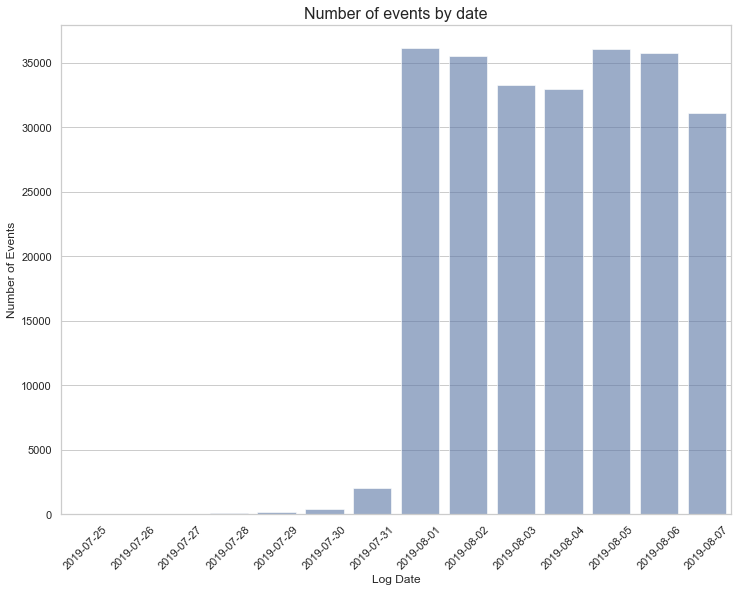

In [29]:
sns.set(style = 'whitegrid')


f, ax = plt.subplots(figsize = (12, 9))
sns.barplot(x = 'event_date',
            y = 'event_name',
            data = df_by_datetime,
            color = 'b',
            alpha = 0.6).set_title("Number of events by date", fontsize = 16)
ax.set(xlabel="Log Date", ylabel = "Number of Events")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

### Observation
We can see that prior to August 1, 2019, there is barely any events logged.  This can be due to a number of possible reasons:

1. The website itself was not officially launched; perhaps those small early numbers were testers trying out the system
2. The sales funnel was not launched until a few days prior to August 1, and those small early numbers again were from testing
3. The website and sales funnel were installed, and a marketing campaign began on August 1 -- a combination of online ads and influencers.  Perhaps those early numbers were also influencers invited to review the product (and got a coupon to get free product in return?)

---

In [30]:
df_users_by_datetime = df.groupby('group').agg({'event_date':'count'}).reset_index()

In [31]:
df_users_by_datetime

group  event_date
0    246       80181
1    247       77950
2    248       85582

In [32]:
df.groupby(['event_date', 'group']).agg({'event_name':'count'}).reset_index()

event_date  group  event_name
0   2019-07-25    246           4
1   2019-07-25    247           1
2   2019-07-25    248           4
3   2019-07-26    246          14
4   2019-07-26    247           8
5   2019-07-26    248           9
6   2019-07-27    246          24
7   2019-07-27    247          23
8   2019-07-27    248           8
9   2019-07-28    246          33
10  2019-07-28    247          36
11  2019-07-28    248          36
12  2019-07-29    246          55
13  2019-07-29    247          58
14  2019-07-29    248          71
15  2019-07-30    246         129
16  2019-07-30    247         138
17  2019-07-30    248         145
18  2019-07-31    246         620
19  2019-07-31    247         664
20  2019-07-31    248         746
21  2019-08-01    246       11561
22  2019-08-01    247       12306
23  2019-08-01    248       12274
24  2019-08-02    246       10946
25  2019-08-02    247       10990
26  2019-08-02    248       13618
27  2019-08-03    246       10575
28  2019-08-03    247       11024
29  2019-08-03    248       11683
30  2019-08-04    246       11514
31  2019-08-04    247        9942
32  2019-08-04    248       11512
33  2019-08-05    246       12368
34  2019-08-05    247       10949
35  2019-08-05    248       12741
36  2019-08-06    246       11726
37  2019-08-06    247       11720
38  2019-08-06    248       12342
39  2019-08-07    246       10612
40  2019-08-07    247       10091
41  2019-08-07    248       10393

All three groups appear to be accounted for if we drop data prior to August 1st.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243713 entries, 2019-07-25 04:43:36 to 2019-08-07 21:15:17
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   group       243713 non-null  int64         
 3   date_time   243713 non-null  datetime64[ns]
 4   event_date  243713 non-null  object        
 5   event_time  243713 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 13.0+ MB


In [34]:
# drop data from before August 1
df = df[df['date_time'] >= '2019-08-01']

## Conlusion on data study and prep
* We eliminated all rows prior to August 1, 2019 -- with minimal impact, only some 2000 rows total out of 244K
* There are about 7500 users
* There are 5 event types that the user experiences
---

<a name = "funnel"></a>
# Study the event funnel

* See what events are in the logs and their frequency of occurrence. Sort them by frequency.
* Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once.
* In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.
* Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)
* At what stage do you lose the most users?
* What share of users make the entire journey from their first event to payment?

#### See what events are in the logs and their frequency of occurrence. Sort them by frequency.

In [35]:
df_by_events = df.groupby(['event_name']).agg({'user_id':'count'}).sort_values('user_id', ascending = False).reset_index()

In [36]:
df_by_events

event_name  user_id
0         MainScreenAppear   117328
1       OffersScreenAppear    46333
2         CartScreenAppear    42303
3  PaymentScreenSuccessful    33918
4                 Tutorial     1005

### Observation
* Grouping by events shows that the MainScreenAppear is number one
* The Tutorial event has little to do with this study, and we will not include it when crunching the numbers

---
### Find the number of users who performed each of these actions. 
- Sort the events by the number of users. 
- Calculate the proportion of users who performed the action at least once.

In [37]:
def create_df_events_by_unique_users(df):
    new_df = df.groupby(['event_name']).agg({'user_id':'nunique'}).sort_values('user_id', ascending = False).reset_index()
    new_df.columns = ['event_name', 'unique_users']
    return new_df

In [38]:
df_events_unique_users = create_df_events_by_unique_users(df)

In [39]:
df_events_unique_users

event_name  unique_users
0         MainScreenAppear          7419
1       OffersScreenAppear          4593
2         CartScreenAppear          3734
3  PaymentScreenSuccessful          3539
4                 Tutorial           840

### Order of events
When we sort by number of users in reverse order, we can see that, with the exception of tutorial, the order of events naturally follow the funnel shape.

The MainScreenAppear has the most users, which makes sense.  That's most likely the first page a visitor will see (by typing in the website, or clicking a link via search results, etc)

Then, while the user is scrolling perhaps, or is about to navigate away, the OffersScreenAppear event occurs.  This could also be a link that they click.  Or it's something that pops up when they add an item to the shopping cart, etc.

Now, the user finally goes to the cart to see what s/he has addeded, and then from there a certain percentage decides to finally clikc the "pay now" button, which brings up the final PaymentScreenSuccessful event.

### Ratios of users
Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)
* At what stage do you lose the most users?
* What share of users make the entire journey from their first event to payment?

In [40]:
# We will drop the Tutorial event since it has nothing to do with the funnel.
df_events_unique_users = df_events_unique_users.drop(df_events_unique_users.index[4])


In [41]:
# This function will calculate the proportion of users that proceed from each stage to the next.
# Takes a dataframe grouped by event, and a group name so we know which group for which
# we're making the calculations

def check_proportions(df_by_events, group):
    print('For group ' + group + ':')
    for i in range(1, len(df_by_events)):
        print('The proportion of ' + df_by_events.loc[i, 'event_name'] +
              ' users coming from ' +
             df_by_events.loc[i-1, 'event_name'] +
             ' is ' + 
             str(round((df_by_events.loc[i, 'unique_users'] /
                                 df_by_events.loc[i-1, 'unique_users'] *
                        100), 2)) + '%')

In [42]:
check_proportions(df_events_unique_users, 'all')

For group all:
The proportion of OffersScreenAppear users coming from MainScreenAppear is 61.91%
The proportion of CartScreenAppear users coming from OffersScreenAppear is 81.3%
The proportion of PaymentScreenSuccessful users coming from CartScreenAppear is 94.78%


In [43]:
from plotly import graph_objects as go

def show_funnel(df, group_name, color):
    fig = go.Figure(go.Funnel(
        name = group_name,
        y = df['event_name'],
        x = df['unique_users'],
        textposition = "inside",
        textinfo = "value+percent previous",
        opacity = 0.65, marker = {"color": color,
                                  "line": {"width": 1, "color": "blue"}},
        connector = {"line": {"color": "lightblue", "dash": "dot", "width": 1}})
        )

    fig.show()

#fig = px.funnel(df_by_events, x='user_id', y='event_name')
#fig.show()

In [44]:
show_funnel(df_events_unique_users, 'Group 246', 'deepskyblue')

### Observation
We lose the most users from the MainScreenAppear to the OffersScreenAppear, i.e. the first event.  So, the user comes onto the website, and basically right away decides the product isn't for him/her and leaves.  Almost 40% of users who visit leave without making a purchase

In [45]:
def calculate_share_entire_journey(df_grouped):
     return (str(round((df_grouped.loc[len(df_grouped) - 1, 'unique_users']) /
              (df_grouped.loc[0, 'unique_users']) * 100, 2)) + '%')

In [46]:
print('The share of users who make the entire journey from their first event to payment is: ' +
     (calculate_share_entire_journey(df_events_unique_users)))

The share of users who make the entire journey from their first event to payment is: 47.7%


<a name = "results"></a>
## Study the results of the experiment

* How many users are there in each group?
* We have two control groups in the A/A test, where we check our mechanisms and calculations. See if there is a statistically significant difference between samples 246 and 247.
* Select the most popular event. In each of the control groups, find the number of users who performed this action. Find their share. Check whether the difference between the groups is statistically significant. Repeat the procedure for all other events (it will save time if you create a special function for this test). Can you confirm that the groups were split properly?
* Do the same thing for the group with altered fonts. Compare the results with those of each of the control groups for each event in isolation. Compare the results with the combined results for the control groups. What conclusions can you draw from the experiment?
* What significance level have you set to test the statistical hypotheses mentioned above? Calculate how many statistical hypothesis tests you carried out. With a statistical significance level of 0.1, one in 10 results could be false. What should the significance level be? If you want to change it, run through the previous steps again and check your conclusions.

### Number of users in each group

In [47]:
df.groupby(['group']).agg({'user_id':'nunique'})

user_id
group         
246       2484
247       2513
248       2537

In [48]:
# let's make a dataframe for each group

df_246 = df[df['group'] == 246]
df_247 = df[df['group'] == 247]
df_248 = df[df['group'] == 248]

In [49]:
# for each group, create a dataframe grouped by events

df_246_events_users = create_df_events_by_unique_users(df_246)
df_247_events_users = create_df_events_by_unique_users(df_247)
df_248_events_users = create_df_events_by_unique_users(df_248)

In [50]:
# drop the Tutorial event rows from each dataframe

df_246_events_users = df_246_events_users.drop(df_246_events_users.index[4])
df_247_events_users = df_247_events_users.drop(df_247_events_users.index[4])
df_248_events_users = df_248_events_users.drop(df_248_events_users.index[4])

In [51]:
df_246_events_users

event_name  unique_users
0         MainScreenAppear          2450
1       OffersScreenAppear          1542
2         CartScreenAppear          1266
3  PaymentScreenSuccessful          1200

In [52]:
df_247_events_users

event_name  unique_users
0         MainScreenAppear          2476
1       OffersScreenAppear          1520
2         CartScreenAppear          1238
3  PaymentScreenSuccessful          1158

In [53]:
df_248_events_users

event_name  unique_users
0         MainScreenAppear          2493
1       OffersScreenAppear          1531
2         CartScreenAppear          1230
3  PaymentScreenSuccessful          1181

In [54]:
# check the proportions of each share of users by event, for each group

check_proportions(df_246_events_users, '246')

For group 246:
The proportion of OffersScreenAppear users coming from MainScreenAppear is 62.94%
The proportion of CartScreenAppear users coming from OffersScreenAppear is 82.1%
The proportion of PaymentScreenSuccessful users coming from CartScreenAppear is 94.79%


In [55]:
show_funnel(df_246_events_users, 'Group 246', 'red')

In [56]:
print('The share of users who make the entire journey from their first event to payment is: ' +
     (calculate_share_entire_journey(df_246_events_users)))

The share of users who make the entire journey from their first event to payment is: 48.98%


In [57]:
check_proportions(df_247_events_users, '247')

For group 247:
The proportion of OffersScreenAppear users coming from MainScreenAppear is 61.39%
The proportion of CartScreenAppear users coming from OffersScreenAppear is 81.45%
The proportion of PaymentScreenSuccessful users coming from CartScreenAppear is 93.54%


In [58]:
show_funnel(df_247_events_users, 'Group 247', 'lightgreen')

In [59]:
print('The share of users who make the entire journey from their first event to payment is: ' +
     (calculate_share_entire_journey(df_247_events_users)))

The share of users who make the entire journey from their first event to payment is: 46.77%


In [60]:
check_proportions(df_248_events_users, '248')

For group 248:
The proportion of OffersScreenAppear users coming from MainScreenAppear is 61.41%
The proportion of CartScreenAppear users coming from OffersScreenAppear is 80.34%
The proportion of PaymentScreenSuccessful users coming from CartScreenAppear is 96.02%


In [61]:
show_funnel(df_248_events_users, 'Group 248', 'purple')

In [62]:
print('The share of users who make the entire journey from their first event to payment is: ' +
     (calculate_share_entire_journey(df_248_events_users)))

The share of users who make the entire journey from their first event to payment is: 47.37%


### Observation
The percentage numbers are pretty close, so let's do some statistical tests



In [63]:
# I enclosed the code into a function that takes two dataframes and an alpha level

def custom_ztest(df1, df2, alpha_level = 0.05):
    
    alpha = alpha_level
    
    print('Chosen alpha level: ', alpha, '\n')
    

    for i in range(1, len(df1)):
        
        successes = (df1.loc[i, 'unique_users'], df2.loc[i, 'unique_users'])
        trials = (df1.loc[i-1, 'unique_users'], df2.loc[i-1, 'unique_users'])

        # success proportion in the first group:
        p1 = successes[0]/trials[0]
        
        # success proportion in the second group:
        p2 = successes[1]/trials[1]

        # success proportion in the combined dataset:
        p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
        
        # the difference between the datasets' proportions
        difference = p1 - p2
        
        # print('sqrt operand: ', (p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1])))
        
        # calculating the statistic in standard deviations of the standard normal distribution
        z_value = difference / mth.sqrt(abs(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1])))
        
        # setting up the standard normal distribution (mean 0, standard deviation 1)
        distr = st.norm(0, 1)

        p_value = (1 - distr.cdf(abs(z_value))) * 2

        print('p-value for proportion of ' + df1.loc[i, 'event_name'] +
              ' users to that of ' +
              df1.loc[i-1, 'event_name'] + ': ', p_value)

        if (p_value < alpha):
            print("Rejecting the null hypothesis: there is a significant difference between the proportions")
        else:
            print("Failed to reject the null hypothesis: there is no reason to consider the proportions different")
        print()

### Null hypothesis #1:
That there is no significant differences between the two control groups from event to event when comparing proportions
### Alternate hyposthesis #1:
That there is significant difference between the two control groups from event to event when comparing proportions

In [64]:
# test for statistical significance between groups 246 and 247

custom_ztest(df_246_events_users, df_247_events_users)

Chosen alpha level:  0.05 

p-value for proportion of OffersScreenAppear users to that of MainScreenAppear:  0.2622344959255778
Failed to reject the null hypothesis: there is no reason to consider the proportions different

p-value for proportion of CartScreenAppear users to that of OffersScreenAppear:  0.6393754713145263
Failed to reject the null hypothesis: there is no reason to consider the proportions different

p-value for proportion of PaymentScreenSuccessful users to that of CartScreenAppear:  0.18243439408067652
Failed to reject the null hypothesis: there is no reason to consider the proportions different



### Result: there is no significant difference in all event comparisons between 246 and 247
**Therefore,** we fail to reject the null hypothesis.  So we can combine the two A/A groups together

In [65]:
# create a dataframe of both groups 246 and 247

df_AA_group = df[df['group'] != 248]

In [66]:
df_AA_users = create_df_events_by_unique_users(df_AA_group)
df_AA_users = df_AA_users.drop(df_AA_users.index[4])
df_AA_users

event_name  unique_users
0         MainScreenAppear          4926
1       OffersScreenAppear          3062
2         CartScreenAppear          2504
3  PaymentScreenSuccessful          2358

In [67]:
check_proportions(df_248_events_users, 'Group 248')

For group Group 248:
The proportion of OffersScreenAppear users coming from MainScreenAppear is 61.41%
The proportion of CartScreenAppear users coming from OffersScreenAppear is 80.34%
The proportion of PaymentScreenSuccessful users coming from CartScreenAppear is 96.02%


In [68]:
check_proportions(df_AA_users, '246 and 247 combined')

For group 246 and 247 combined:
The proportion of OffersScreenAppear users coming from MainScreenAppear is 62.16%
The proportion of CartScreenAppear users coming from OffersScreenAppear is 81.78%
The proportion of PaymentScreenSuccessful users coming from CartScreenAppear is 94.17%


In [69]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'AA Group',
    y = df_AA_users['event_name'],
    x = df_AA_users['unique_users'],
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = '248 users AKA B group',
    orientation = "h",
    y = df_248_events_users['event_name'],
    x = df_248_events_users['unique_users'],
    textinfo = "value+percent previous"))

fig.show()

In [70]:
print('The share of users who make the entire journey from their first event to payment is: ' +
     (calculate_share_entire_journey(df_AA_users)))

The share of users who make the entire journey from their first event to payment is: 47.87%


In [71]:
print('The share of users who make the entire journey from their first event to payment is: ' +
     (calculate_share_entire_journey(df_248_events_users)))

The share of users who make the entire journey from their first event to payment is: 47.37%


### Null hypothesis #2:
That there is no significant differences between the AA group and the B group (aka group 248) from event to event
### Alternate hypothesis #2:
There is a significant difference between the AA group and the B group from event to event

In [72]:
custom_ztest(df_AA_users, df_248_events_users)

Chosen alpha level:  0.05 

p-value for proportion of OffersScreenAppear users to that of MainScreenAppear:  0.5308589432077624
Failed to reject the null hypothesis: there is no reason to consider the proportions different

p-value for proportion of CartScreenAppear users to that of OffersScreenAppear:  0.23905954279947372
Failed to reject the null hypothesis: there is no reason to consider the proportions different

p-value for proportion of PaymentScreenSuccessful users to that of CartScreenAppear:  0.017114434319547067
Rejecting the null hypothesis: there is a significant difference between the proportions



### Observation
The tests show that the only instance where there is significant difference is in the final part of the funnel, the PaymentScreenSuccessful event.

Since this is (presumably) not a life/death situation, we choose the alpha level to be 0.05.  Even with 0.1 as a suggestion, we would get the same results.

<a name = "conclusion"></a>
## Conclusion

### We analyzed a dataset of over 244k logs from about 7500 users to see if changing the fonts resulted in better sales.

Our control group consisted of two A groups, and one test group (B group), each of which comprised ~2400 users.

There were no significant differences between the two A groups, which indicated we can be confident in the accuracy of our testing.

Intuitively, it would seem that the B group (group 248) did slightly better, but only a little bit.  We can see that the PaymentScreenSuccessful proportions for the B group is almost a full 2% higher.  However, in the A group the percentages for the first two parts of the funnels were around 1% higher in the A group.

**UPDATE:** When we do a simple comparison of the amount of users from each group who make the entire journey, however, we get a difference of only 0.5%, with actually the control (A/A) group doing better.  That difference turns out to be about 38 users.

If anything, this test suggests that we should perhaps compare other metrics such as profits, to see if we can gain any more useful insights.

Otherwise, from this testing, I would conclude that if there were any differences in switching fonts, that difference is very negligible.  I would recommend we do something else that can show more significant difference.

**RECOMMENDATION ON FONT CHANGE:** We suggest no change in font.